In [168]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from IPython.display import Image, display
import os
import matplotlib

In [169]:
# Function to display images using matplotlib
def plt_imshow(title, image):
    # Convert BGR color space (OpenCV default) to RGB color space (Matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Display the image using matplotlib
    plt.imshow(image)
    # Set the title of the plot
    plt.title(title)
    # Disable grid lines on the plot
    plt.grid(False)
    # Show the plot
    plt.show()

In [170]:
args = {
    "image": "/Users/leodidier/DataspellProjects/basic_img_proc_op/images/opencv_morphological_ops_pyimagesearch_logo.png"
}

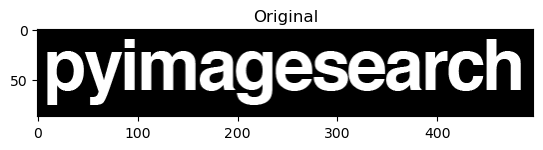

In [171]:
# Lecture de l'image à partir du chemin spécifié dans args["image"]
image = cv2.imread(args["image"])
# Conversion de l'image du format BGR (OpenCV) vers niveaux de gris
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Affichage de l'image originale en utilisant la fonction plt_imshow personnalisée
plt_imshow("Original", image)


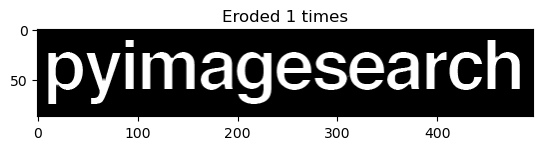

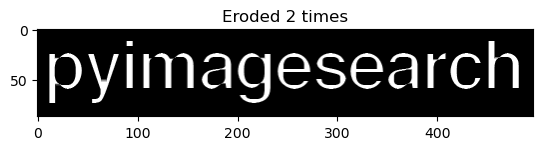

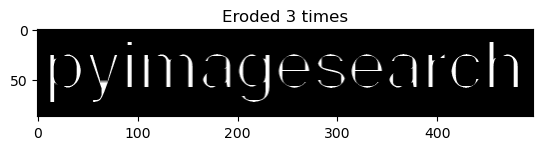

In [172]:
# L'érosion est une opération morphologique qui "érode" les contours des objets blancs 
# dans une image binaire ou en niveaux de gris.
# Pour chaque pixel, elle prend le minimum des pixels voisins définis par l'élément structurant
# Cela a pour effet de:
# - Réduire la taille des objets clairs
# - Élargir les zones sombres  
# - Peut faire disparaître les petits détails
# - Utile pour supprimer le bruit ou séparer des objets connectés
# Le paramètre iterations contrôle combien de fois l'opération est appliquée
for i in range(0, 3):
    # cv2.erode() prend en paramètres:
    # - l'image source (ici une copie de gray)
    # - l'élément structurant (None = matrice 3x3 par défaut) 
    # - le nombre d'itérations
    eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
    # Affiche l'image érodée avec le nombre d'itérations dans le titre
    plt_imshow("Eroded {} times".format(i + 1), eroded)


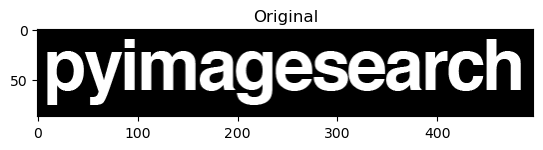

In [173]:
plt_imshow("Original", image)

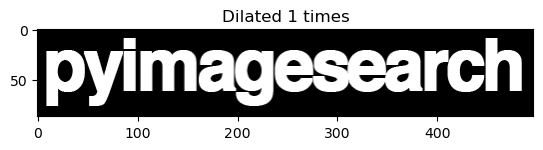

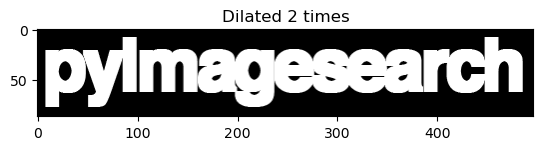

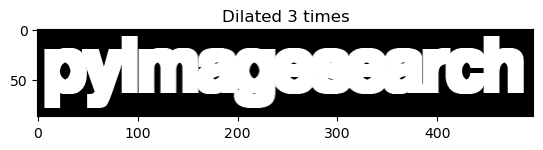

In [174]:
# La dilatation est une opération morphologique qui "élargit" les contours des objets blancs 
# dans une image binaire ou en niveaux de gris.
# Pour chaque pixel, elle prend le maximum des pixels voisins définis par l'élément structurant
# Cela a pour effet de:
# - Augmenter la taille des objets clairs
# - Réduire les zones sombres
# - Peut connecter des objets proches
# - Utile pour combler des trous ou connecter des régions fragmentées
# Le paramètre iterations contrôle combien de fois l'opération est appliquée
for i in range(0, 3):
    # cv2.dilate() prend en paramètres:
    # - l'image source (ici une copie de gray) 
    # - l'élément structurant (None = matrice 3x3 par défaut)
    # - le nombre d'itérations
    dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
    plt_imshow("Dilated {} times".format(i + 1), dilated)


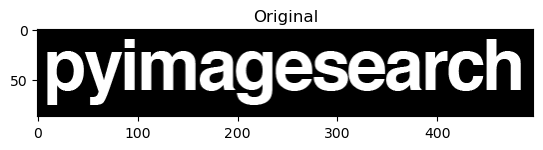

In [175]:
plt_imshow("Original", image)

In [176]:
# Définition d'une liste kernelSizes contenant 3 tuples qui représentent différentes tailles de noyaux (kernels)
# Chaque tuple contient deux valeurs identiques représentant la hauteur et largeur du noyau:
# - (3, 3) : noyau 3x3 pixels 
# - (5, 5) : noyau 5x5 pixels
# - (7, 7) : noyau 7x7 pixels
# Ces tailles de noyaux seront utilisées plus tard pour des opérations morphologiques
kernelSizes = [(3, 3), (5, 5), (7, 7)]


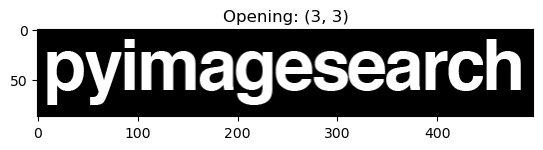

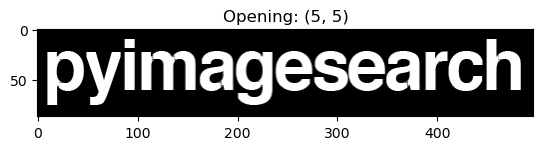

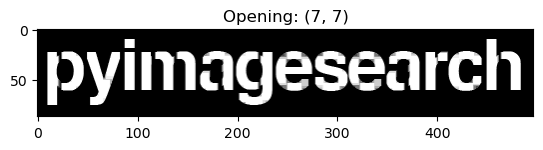

In [177]:
# Boucle à travers les différentes tailles de noyaux définies dans kernelSizes
for kernelSize in kernelSizes:
    # Création de l'élément structurant rectangulaire avec cv2.getStructuringElement()
    # - cv2.MORPH_RECT spécifie une forme rectangulaire
    # - kernelSize définit la taille (largeur, hauteur) du noyau
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)

    # Application de l'opération d'ouverture morphologique avec cv2.morphologyEx()
    # L'ouverture est une érosion suivie d'une dilatation
    # - gray.copy() : utilise une copie de l'image en niveaux de gris
    # - cv2.MORPH_OPEN : spécifie l'opération d'ouverture
    # - kernel : l'élément structurant créé précédemment
    opening = cv2.morphologyEx(gray.copy(), cv2.MORPH_OPEN, kernel)

    # Affichage de l'image résultante avec la fonction plt_imshow
    # Le titre inclut la taille du noyau utilisé (largeur x hauteur)
    plt_imshow("Opening: ({}, {})".format(kernelSize[0], kernelSize[1]), opening)


# Explication détaillée du code de fermeture morphologique

Le code effectue une opération de fermeture morphologique sur l'image en niveaux de gris. Voici le détail :

1. `plt_imshow("Original", image)` - Affiche d'abord l'image originale comme référence 

2. `for kernelSize in kernelSizes:` - Boucle sur 3 tailles différentes de noyaux [(3,3), (5,5), (7,7)]

3. Pour chaque taille de noyau :

   - `kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)` 
   Crée un élément structurant rectangulaire de la taille spécifiée

   - `closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)`
   Applique l'opération de fermeture qui est composée de :
      - Une dilatation suivie d'une érosion  
      - Utile pour remplir les petits trous noirs
      - Fusionner les objets proches
      - Lisser les contours

   - `plt_imshow("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)`
   Affiche le résultat avec la taille du noyau utilisé

L'effet de la fermeture est plus prononcé avec des noyaux plus grands, car ils prennent en compte un voisinage plus large de pixels.

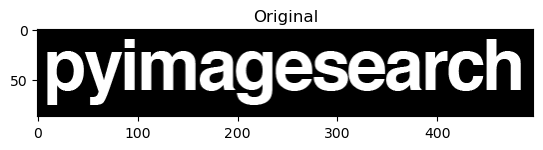

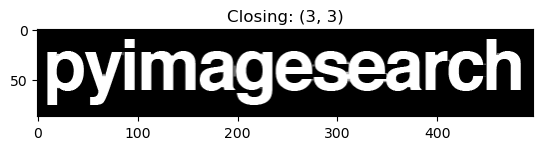

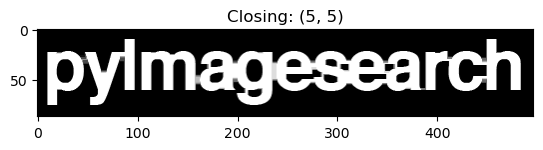

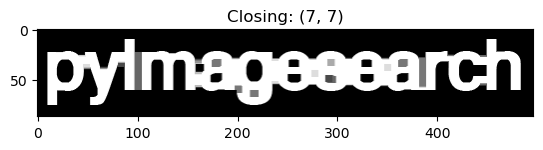

In [178]:
plt_imshow("Original", image)

for kernelSize in kernelSizes:
    # Création d'un élément structurant rectangulaire de taille kernelSize
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    # Application de la fermeture morphologique (dilatation puis érosion)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    # Affichage du résultat avec la taille du noyau utilisé
    plt_imshow("Closing: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)


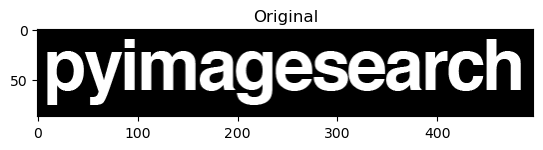

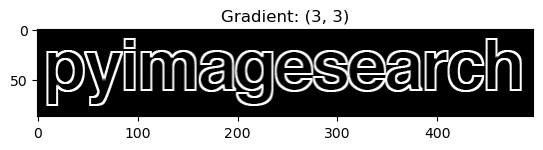

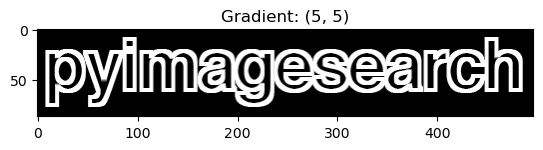

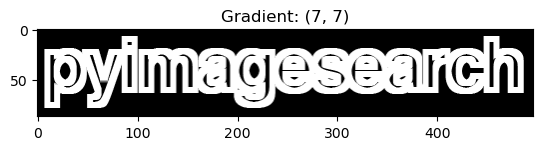

In [179]:
# Affichage de l'image originale comme référence
plt_imshow("Original", image)

# Boucle sur les différentes tailles de noyaux morphologiques
for kernelSize in kernelSizes:
    # Construction d'un élément structurant rectangulaire de taille kernelSize
    # cv2.MORPH_RECT indique un noyau de forme rectangulaire
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)

    # Application du gradient morphologique qui est la différence 
    # entre une dilatation et une érosion de l'image
    # Cela permet de détecter les contours des objets
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)

    # Affichage du résultat avec la taille du noyau utilisée
    # Le gradient fait ressortir les transitions dans l'image
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)


Je vais expliquer en détail ce bloc de code sous forme de cellule markdown.



# Explication détaillée des opérations morphologiques Blackhat

Le code effectue une opération morphologique "Blackhat" sur l'image en niveaux de gris. Voici les détails :

1. `rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))`
   - Crée un élément structurant rectangulaire de taille 13x5 pixels
   - `cv2.MORPH_RECT` indique une forme rectangulaire
   - La taille (13,5) est choisie pour correspondre à la forme des éléments qu'on souhaite détecter

2. `blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)`
   - Applique l'opération Blackhat qui est définie comme la différence entre :
     * La fermeture de l'image (dilatation suivie d'une érosion)
     * L'image originale
   - Cette opération permet de détecter :
     * Les éléments sombres sur fond clair
     * Les structures plus petites que l'élément structurant
     * Les détails qui ont disparu lors de la fermeture

L'opération Blackhat est particulièrement utile pour :
- Détecter du texte sombre sur fond clair
- Trouver des détails sombres dans des zones plus claires
- Améliorer le contraste de certains éléments sombres


# Explication détaillée de l'opération morphologique Top Hat

La ligne de code effectue une opération morphologique "Top Hat" sur l'image en niveaux de gris :

`tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)`

Les composants :

1. `gray` : L'image source en niveaux de gris sur laquelle l'opération est appliquée

2. `cv2.MORPH_TOPHAT` : Le type d'opération morphologique "Top Hat" qui est défini comme :
   - La différence entre l'image originale et son ouverture morphologique
   - Permet d'extraire les détails clairs sur fond sombre
   - Met en évidence les éléments plus petits que l'élément structurant

3. `rectKernel` : L'élément structurant rectangulaire de taille 13x5 pixels précédemment défini
   - Détermine la taille et la forme de la zone analysée pour chaque pixel
   - La taille est choisie pour correspondre aux structures d'intérêt dans l'image

Cette opération est particulièrement utile pour :
- Détecter des objets clairs sur fond sombre  
- Extraire de petits détails lumineux
- Améliorer le contraste des éléments clairs
- Supprimer les variations lentes d'intensité dans l'image

In [180]:
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

In [181]:
# Application de l'opération Top Hat qui extrait les détails clairs sur fond sombre
# en soustrayant l'ouverture morphologique de l'image originale
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)


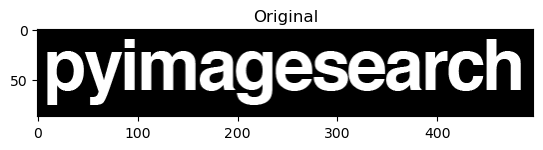

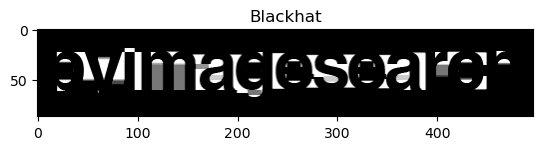

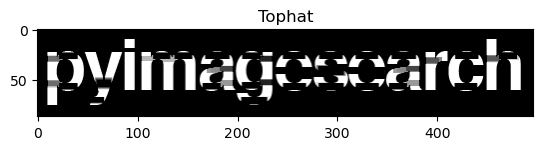

In [182]:
plt_imshow("Original", image)
plt_imshow("Blackhat", blackhat)
plt_imshow("Tophat", tophat)